<a href="https://colab.research.google.com/github/BamBuStiK/deep_learning/blob/main/maskSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import display
from PIL import Image
import numpy as np

#Load Coco index mapping

In [2]:
labels_to_names_seq= {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}
category_index={k: {'id': k, 'name': labels_to_names_seq[k]} for k in labels_to_names_seq}

#Load image

Web crawl naver webtoon images and create files

In [3]:
from bs4 import BeautifulSoup 
import urllib.request
import os, re #태그 제거

In [4]:
#Access Denied 에러 우회
opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)

In [5]:
#크롤링 할 웹툰 주소로 웹 페이지 요청
html = urllib.request.urlopen("https://comic.naver.com/webtoon/list?titleId=774862&weekday=wed")
soup = BeautifulSoup(html.read(),"html.parser") #웹 페이지 파싱
html.close() #닫기

In [6]:
def get_sources(path, directory_name, series_num):
    img_path = path+"/"+directory_name+"/"+series_num
    os.chdir(img_path)
    return os.listdir(img_path)

In [7]:
comic_title = soup.find("div", {"class", "detail"}).find("h2").text.split()[0] #만화 이름

In [8]:
os.chdir("/content/dbsti") #다운로드 폴더
dir = comic_title
if not os.path.isdir(dir):
    os.mkdir(dir)
    print(comic_title+" 디렉토리 생성")
else:
    print("같은 이름의 디렉토리가 이미 있음")
os.chdir("/content/dbsti/"+dir) #다운로드 받을 폴더로 이동

조조코믹스 디렉토리 생성


In [9]:
comic_list=[]#웹툰 모든 화만 배열 저장
tmp_list=soup.select('td > a') #<td>안에 <a>태그에
for i in tmp_list:
    if('https' in i['href']): #다음 화를 미리 만나보세요 링크 패스
        continue
    comic_list.append(i['href'])
comic_list = sorted(set(comic_list))

In [10]:
for i in range(len(comic_list)):#comic list 안에서의 url을 beautifulSoup로 각각 접속한다.
    if i > 0:
        break
    ep_url = url="https://comic.naver.com"+comic_list[i]
    html = urllib.request.urlopen(ep_url)
    soup2 = BeautifulSoup(html.read(),"html.parser")
    
    ep = soup2.find('h3') #<h3>이름</h3>
    ep_title = re.sub('<.*?>', '', str(ep)) #이름만 남게
    #print(ep)
    #print(ep_title)

In [11]:
    if not os.path.isdir(ep_title):
        os.mkdir(ep_title)
        print(ep_title+" 디렉토리 생성")
    else:
        print("같은 이름의 디렉토리가 이미 있음")
    os.chdir(ep_title) #이동

작별인사 3화 디렉토리 생성


In [12]:
    img_div = soup2.find("div", {"class", "wt_viewer"})
    img_all = img_div.findAll("img")

In [13]:
    num = 1
    for j in img_all:
        img_path = j.get("src")
        img_num = str(num)+".png"
        urllib.request.urlretrieve(img_path, img_num)
        num = num + 1
    print(ep_title+" 다운로드 완료")
    os.chdir("..") #상위 폴더로

작별인사 3화 다운로드 완료


In [14]:
print("다운로드 끝")

다운로드 끝


In [15]:
pwd

'/content/dbsti/조조코믹스'

Load image using numpy

In [16]:
image_path='20.png'
print(image_path)

20.png


In [17]:
pwd

'/content/dbsti/조조코믹스'

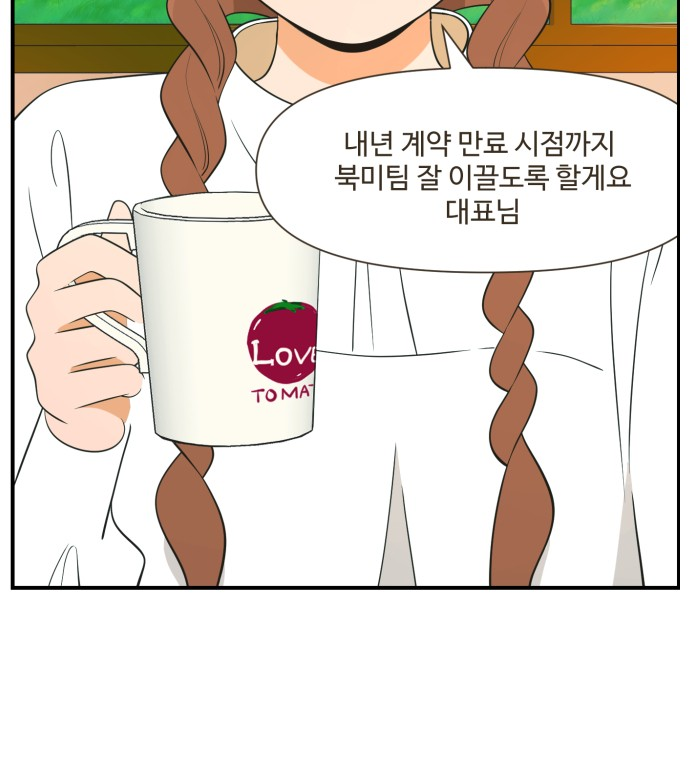

In [18]:
#image_path='20.png'

with open("/content/dbsti/조조코믹스/작별인사 3화/20.png", 'rb') as f:
  np_image_strings=np.array({f.read()})

image=Image.open("/content/dbsti/조조코믹스/작별인사 3화/20.png")
width,height=image.size
np_image=np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

display.display(display.Image("/content/dbsti/조조코믹스/작별인사 3화/20.png", width=1024))

[4, 0, 686, 596]


True

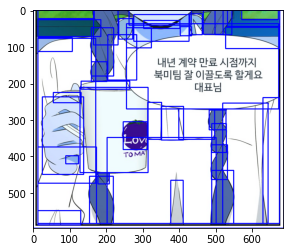

In [21]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/dbsti/조조코믹스/작별인사 3화/20.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
dst = cv2.Canny(gray, 0, 150)
blured = cv2.blur(dst, (5,5), 0)    
MIN_CONTOUR_AREA=200
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for contour in Contours:
    if cv2.contourArea(contour) > MIN_CONTOUR_AREA:
        [X, Y, W, H] = cv2.boundingRect(contour)
        box=cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)

cropped_image = img[Y:Y+H, X:X+W]
print([X,Y,W,H])
plt.imshow(cropped_image)
cv2.imwrite('boundingBox.png', cropped_image)

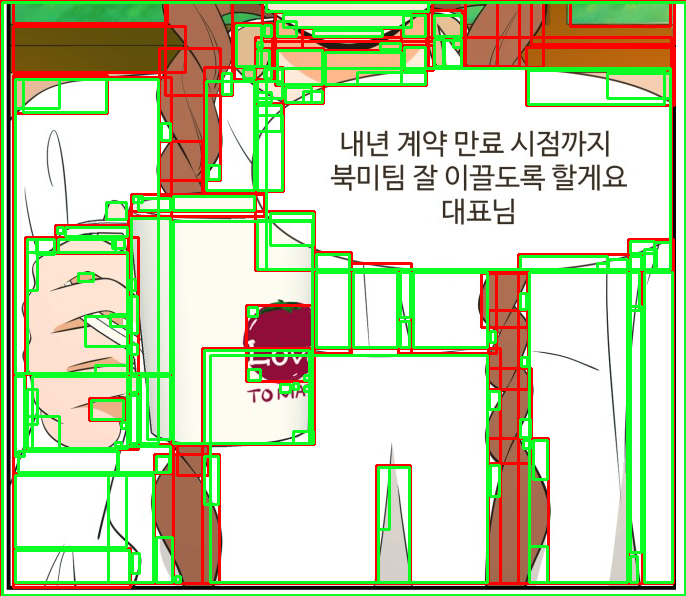

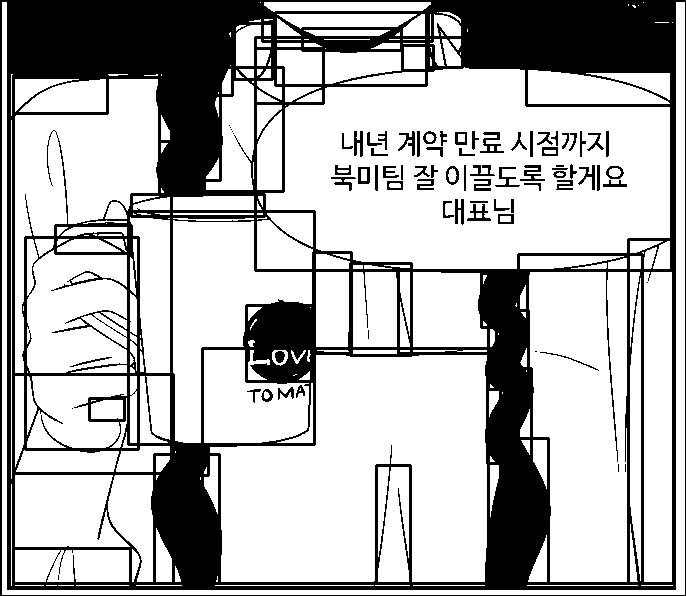

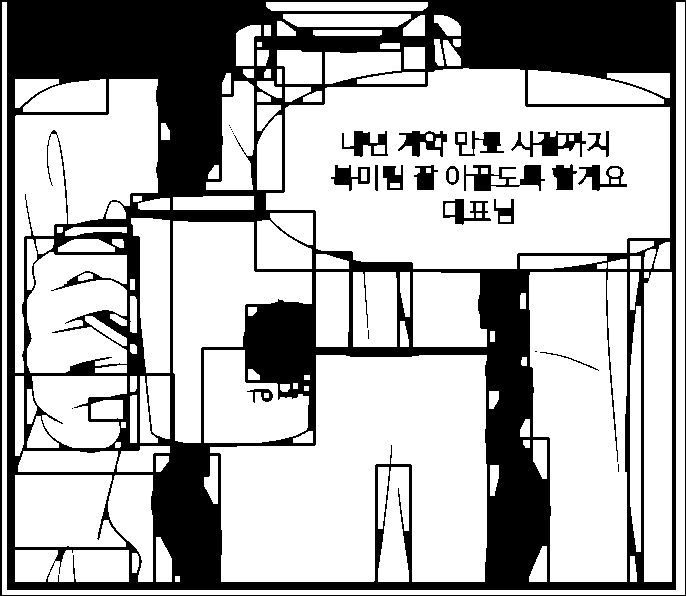

-1

In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, Otsu's threshold
image = cv2.imread('/content/dbsti/조조코믹스/boundingBox.png')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

cv2_imshow(image)
cv2_imshow(thresh)
cv2_imshow(opening)
cv2.waitKey()

Create Tensorflow session

In [ ]:
!mkdir /content/data

In [ ]:
!mkdir ./pretrained
!wget -O ./pretrained/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_mask_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt

--2022-10-12 01:07:53--  http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 209.85.200.128, 2607:f8b0:4001:c16::80
Connecting to download.tensorflow.org (download.tensorflow.org)|209.85.200.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177817887 (170M) [application/x-tar]
Saving to: ‘./pretrained/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’

./pretrained/mask_r 100%[===================>] 169.58M   177MB/s    in 1.0s    

2022-10-12 01:07:55 (177 MB/s) - ‘./pretrained/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [177817887/177817887]

--2022-10-12 01:07:55--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com 

In [ ]:
!tar -xvf ./pretrained/mask*.tar.gz -C ./pretrained #x:압축 해제, v: 해제과정 표시, f:파일 이름 지정

mask_rcnn_inception_v2_coco_2018_01_28/
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
mask_rcnn_inception_v2_coco_2018_01_28/checkpoint
mask_rcnn_inception_v2_coco_2018_01_28/pipeline.config
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
#session=tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=tf.graph())
#num_detections, detection_boxes, detection_classes, detection_scores, detection_masks, image_info = session.run(
 #   ['NumDetection:0', 'DetectionBoxes:0', 'DetectionClasses:0', 'DetectionScores:0', 'DetectionMasks:0', 'ImageInfo:0'],
  #  feed_dict={'PlaceHolder:0', np_image_strings})

num_detections= 'NumDetection:0'
detection_boxes= 'DetectionBoxes:0'
detection_classes= 'DetectionClasses:0'
detection_scores= 'DetectionScores:0'
detection_masks= 'DetectionMasks:0'
image_info= 'ImageInfo:0'

NumDetection=num_detections['PlaceHolder:0', np_image_strings]
DetectionBoxes=detection_boxes['PlaceHolder:0', np_image_strings]
DetectionClasses=detection_classes['PlaceHolder:0', np_image_strings]
DetectionScores=detection_scores['PlaceHolder:0', np_image_strings]
DetectionMasks=detection_masks['PlaceHolder:0', np_image_strings]
ImageInfo=image_info['PlaceHolder:0', np_image_strings]

num_detections=np.squeeze(num_detections.astype(np.int32), axis=(0,))
detection_boxes = np.squeeze(detection_boxes * image_info[0, 2], axis=(0,))[0:num_detections]
detection_scores = np.squeeze(detection_scores, axis=(0,))[0:num_detections]
detection_classes=np.squeeze(detection_classes.astype(np.int32), axis=(0,))[0:num_detections]
instance_masks=np.squeeze(detection_masks, axis=(0,))[0:num_detections]
ymin,xmin,ymax,xmax=np.split(detection_boxes, 4, axis=-1)
processed_boxes=np.concatenate([xmin,ymin,xmax-xmin, ymax-ymin], axis=-1)
segmentations = coco_metric.generate_segmentation_from_masks(instance_masks, processed_boxes, height, width)

TypeError: ignored